# 9. Manualna ekstrakcja cech z utworów muzycznych

## 9.1. Pobierz dane
Dane to 30-sekundowe próbki utworów z dziesięciu kategorii (gatunków). Oryginalny zbiór danych *gitzan* zawieraję po 100 fragmentów utworów każdej kategorii. Dane do obróbki podczas zajęć zostały zredukowane - do 10 utworów/kategorię. Plik zajmuje około 120MB.

In [ ]:
!wget https://dysk.agh.edu.pl/s/Ewqj459KS6eTBd2/download -O gitzan_small.zip
!unzip gitzan_small.zip

--2022-05-04 14:40:20--  https://dysk.agh.edu.pl/s/Ewqj459KS6eTBd2/download
Resolving dysk.agh.edu.pl (dysk.agh.edu.pl)... 149.156.96.4, 2001:6d8:10:1060::6004
Connecting to dysk.agh.edu.pl (dysk.agh.edu.pl)|149.156.96.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128150658 (122M) [application/zip]
Saving to: ‘gitzan_small.zip’

gitzan_small.zip    100%[===================>] 122.21M  15.8MB/s    in 9.4s    

2022-05-04 14:40:31 (13.0 MB/s) - ‘gitzan_small.zip’ saved [128150658/128150658]

Archive:  gitzan_small.zip
   creating: genres_original/
   creating: genres_original/blues/
  inflating: genres_original/blues/blues.00000.wav  
  inflating: genres_original/blues/blues.00001.wav  
  inflating: genres_original/blues/blues.00002.wav  
  inflating: genres_original/blues/blues.00003.wav  
  inflating: genres_original/blues/blues.00004.wav  
  inflating: genres_original/blues/blues.00005.wav  
  inflating: genres_original/blues/blues.00006.wav  
  inflating:

Możesz odtworzyć wybrany utwór...

In [ ]:
audio_path = 'genres_original/blues/blues.00008.wav'

import IPython.display as ipd
ipd.Audio(audio_path)

Będziemy używali biblioteki librosa do przetwarzania danych audio.

Zmienna sr to *sampling rate* (czestość próbkowania). Standardem jest 44100, ale librosa przyjmuje defaultową wartość 22050, co odpowiada pasmu przenoszenia do 10kHz.

In [ ]:
import numpy as np
import librosa

audio_path = 'genres_original/blues/blues.00000.wav'
x , sr = librosa.load(audio_path)
print(x.shape,sr)
print(x.shape[0]/sr)
x , sr = librosa.load(audio_path, sr=44100)
print(x.shape,sr)
print(f'Długość nagrania: {x.shape[0]/sr} sec')


(661794,) 22050
30.013333333333332
(1323588,) 44100
Długość nagrania: 30.013333333333332 sec


## 9.2. Załaduj wszystkie pliki audio
Wszystkie pliki zostaną umieszczone w Pandas DataFrame. Nazwy folderów (i plików) odpowiadają gatunkom muzycznym.

**TODO 9.2.1**
1. Utwórz DataFrame przekazując w konstruktorze słownik, którego kluczami sa nazwy kolumn, a wartościami listy. Na przykład postaci
```{'nazwa1':lista1,'nazwa2':lista2}```
2. Nazwij kolumny: 'genre', 'file', 'audio', 'sr'


In [ ]:
#load all
import numpy as np
import pandas as pd
import librosa

import os

root_folder = 'genres_original'
genres = []
audio_data = []
files=[]
sampling_rates=[]
for genre in os.listdir(root_folder):
    genre_folder=root_folder+'/'+genre
    for audio_file_path in os.listdir(genre_folder):
      fp=genre_folder+'/'+audio_file_path
      x,sr = librosa.load(fp)
      genres.append(genre)
      files.append(audio_file_path)
      audio_data.append(x)
      sampling_rates.append(sr)

import pandas as pd

df = pd.DataFrame({'genre':___,???:___})
df.head(10)


,genre,file,audio,sr
0,classical,classical.00009.wav,"[0.014556885, 0.020904541, 0.014343262, 0.0140...",22050
1,classical,classical.00004.wav,"[-0.010772705, -0.020019531, -0.024261475, -0....",22050
2,classical,classical.00002.wav,"[-0.04046631, -0.07815552, -0.087371826, -0.09...",22050
3,classical,classical.00003.wav,"[-0.008331299, -0.022583008, -0.043670654, -0....",22050
4,classical,classical.00001.wav,"[-0.011383057, -0.002166748, 0.01687622, 0.015...",22050
5,classical,classical.00008.wav,"[0.015380859, 0.020874023, 0.011199951, 0.0045...",22050
6,classical,classical.00006.wav,"[-0.015197754, -0.024658203, -0.014556885, -0....",22050
7,classical,classical.00007.wav,"[-0.06890869, -0.10128784, -0.07559204, -0.065...",22050
8,classical,classical.00000.wav,"[-0.020080566, -0.017486572, 0.004180908, 0.00...",22050
9,classical,classical.00005.wav,"[-0.024597168, -0.04446411, -0.044281006, -0.0...",22050


In [ ]:
# Sprawdź rozmiary df. Powinno być (100,4)
df.shape

(100, 4)

### 9.2.1 Dostęp do danych
Wybierz jeden z utworów i sprawdź, jak uzyskać dostęp do jego danych.

In [ ]:
# czym jest df.audio[df.file=='blues.00000.wav']
s = df.audio[df.file=='blues.00000.wav']
print(type(s))
print(s.shape)
print(s)
x = s.iloc[0]
print(x)
sr = df.sr[df.file=='blues.00000.wav'].iloc[0]
print(sr)

<class 'pandas.core.series.Series'>
(1,)
19    [0.0073242188, 0.016601562, 0.0076293945, -0.0...
Name: audio, dtype: object
[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
22050


Wizualizacja przebiegu

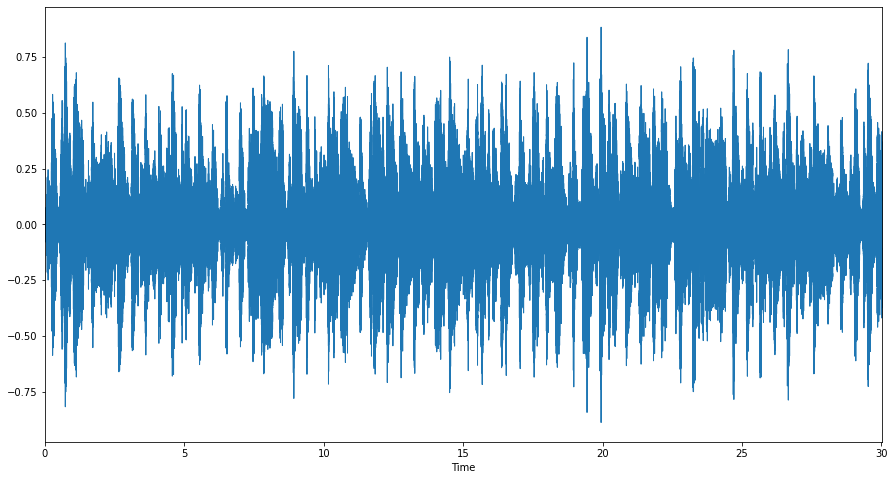

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.rcParams["figure.figsize"] = (15,8)
librosa.display.waveshow(x, sr=sr);

### 9.2.2 Transformacja FFT

Większość cech utworów muzycznych  jest ekstrahowana na podstawie analizy spektrum dźwięku i jego zmian. Do konwersji reprezentacji sygnału w dziedzinie czasu do dziedziny czestotliwości wykorzystywana jest szybka transformacja Fouriera.

Utworzymy przebieg będący superpozycją dwóch sinsusoid.

**TODO 9.2.2**
* Popraw poniższy kod, aby narysowany został fragment przebiegu pokazujacy sinusoidę....

(661500,)


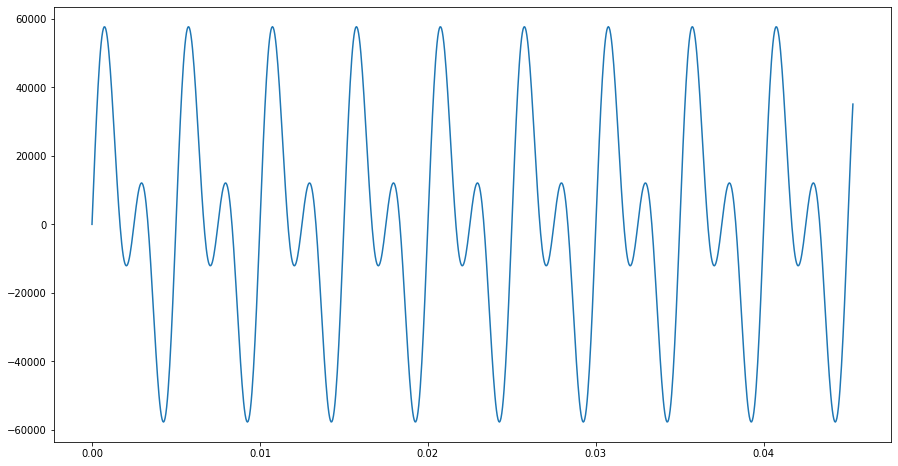

In [ ]:
# około 30 sekund przy czasie próbkowania sr
# t=np.linspace(0,30,x.shape[0],endpoint=False)
t=np.linspace(0,30,30*22050,endpoint=False)
print(t.shape)
# sygnał 200 i 400 Hz
signal=np.sin(2*np.pi*200*t) + np.sin(2*np.pi*400*t)
signal=signal*(2**15)
plt.plot(t[0:???],signal[0:????])
plt.show()

Transformacja Fouriera zamienia sygnał w dziedzinie czasu na reprezentację w dziedzinie czestotliwości.

Narysujmy wynik transformacji.

**TODO 9.2.3**
* Co się stanie jeżeli zmniejszymy window_length? Np. do 1 sekundy (22050), trochę mniej niż sekundy (22000), około 93ms (2048)

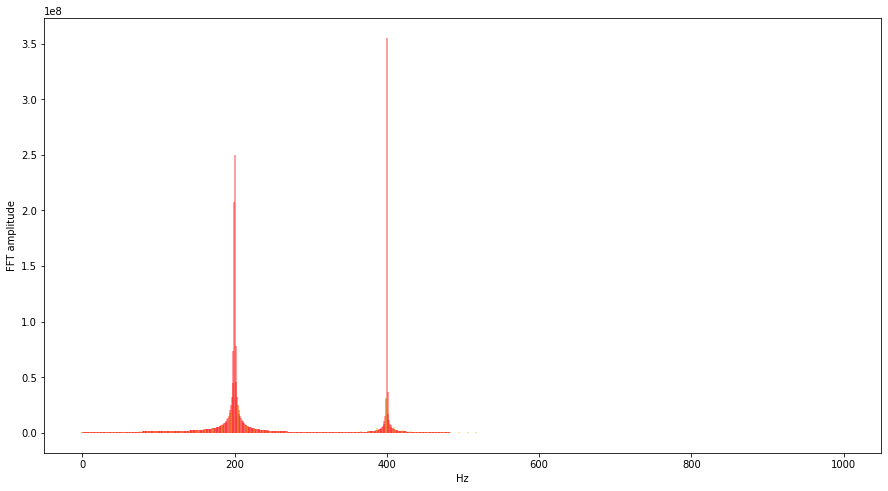

In [ ]:
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

def plot_fft(signal,start,window_length,max_freq=11025,sr=22050,color='b',scale=1):
  y=signal[start:start+window_length]
  yf = fft(y)
  xf = fftfreq(window_length, 1 / sr)[:window_length//2]
  limit=xf[xf<=max_freq].shape[0]
  plt.vlines(xf[0:limit], np.zeros(limit),scale*np.abs(yf[0:limit]),colors=color,alpha=0.5)
  plt.grid()
  plt.xlabel('Hz')
  plt.ylabel('FFT amplitude')

# plot_fft(signal,start=0,window_length=signal.shape[0],max_freq=1000)
plot_fft(signal,start=0,window_length=???,max_freq=1000,color='r')
plot_fft(signal,start=0,window_length=????,max_freq=1000,color='y')
plt.show()



**TODO 9.2.4**
* Wydrukuj spektrum sygnału dla 3 punktów w czasie (różniacych się o kilkadziesiąt milisekund), używając róznych kolorów ('r', 'g', 'b'). Ile to będzie kilkadziesiąt milisekund?

Dla różnych momentów czasu rozkład czestotliwości powinien się zmieniać.

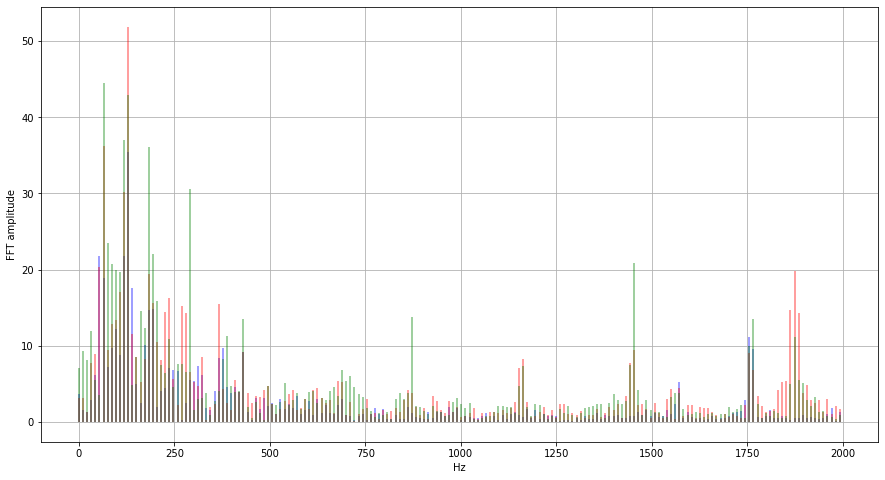

In [ ]:
# x = df.audio[df.file=='blues.00000.wav']
# x = df.audio[df.file=='blues.00000.wav'].iloc[0]

# t=np.linspace(0,30,x.shape[0])
# noise=np.sin(2*np.pi*t*200)
# x=x+noise
# noise=np.sin(2*np.pi*t*400)
# x=x+noise

# plot_fft(x,4*22050,22050,1000,'b')
# # plot_fft(x,4*22050+2205,800,1000,'y',scale=1)
# plt.plot(t[0:500],noise[0:500])
# plt.show()

# print(type(x))
# for k in x:
#   print(k)
# plot_fft(x,200,2048,22050)
# print(x.iloc[0])
x = df.audio[df.file=='blues.00000.wav'].iloc[0]
plot_fft(x,start= ???,window_length=2048,max_freq=2000,color='b')
plot_fft(x,start=???,window_length=2048,max_freq=2000,color='r')
plot_fft(x,start=????,window_length=2048,max_freq=2000,color='g')


### 9.2.3 Spektrogram

Funkcja stft zwraca reprezentację signał w dziedzinie czasu i czestotliwości poprzez wyznaczanie transformacji Fouriera dla kolejnych okien (mogą się nakładać) .

Cytując:




This function returns a complex-valued matrix D such that

* np.abs(D[f, t]) is the magnitude of frequency bin f at frame t, and

* np.angle(D[f, t]) is the phase of frequency bin f at frame t.

(1025, 1293)


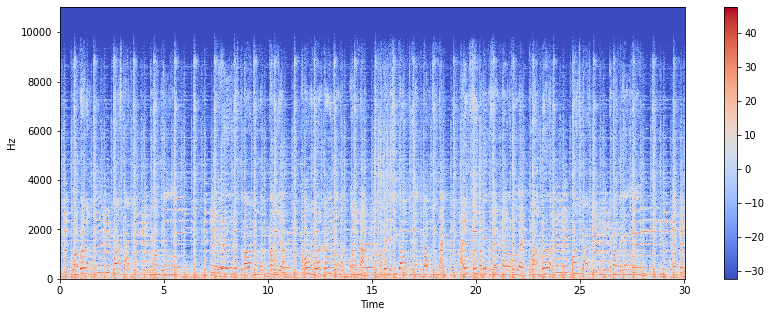

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
print(X.shape)

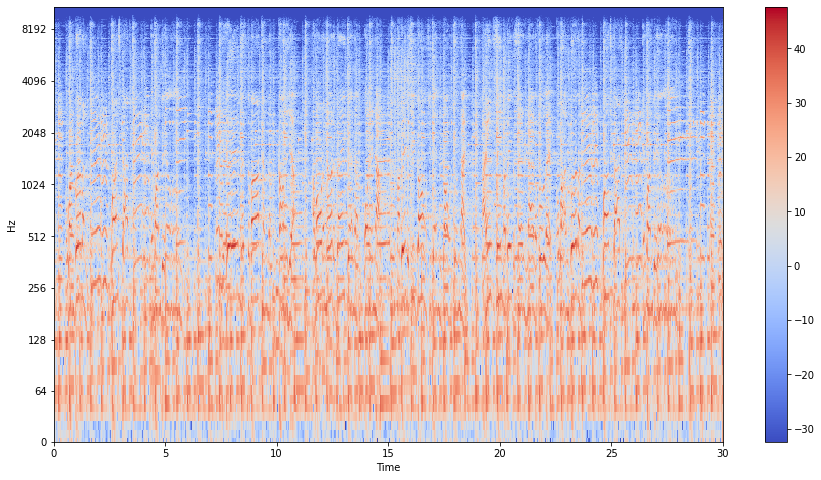

In [ ]:
# zmiana na logarytmy
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

Analiza rozmiarów spektrogramu. Ma on 1293 kolumny. Czyli 1293 razy wykonano transformację FFT.

**TODO 9.2.5**
* Oblicz przesunięcie pomiędzy oknami

In [ ]:
# Skok pomiedzy oknami FFT (hop_length)
print(f'Skok pomiędzy oknami:{??? *sr/????} (tak naprawdę 512)')

Skok pomiędzy oknami:511.6009280742459 (tak naprawdę 512)


**TODO 9.2.6**

Narysuj diagram częstotliwości dla czasu t=5sec.

* częstość próbkowania sr=22050
* standardowa wielkośc przesunięcia okna dla funkcji stft  512
* która to będzie kolumna?

(1025, 1293)
(1025,)


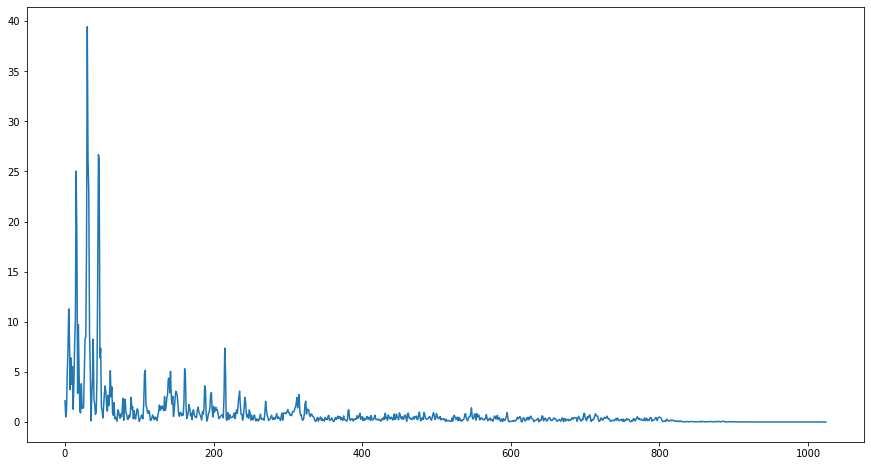

In [ ]:
X = librosa.stft(x)
print(X.shape)
col=????
amp = X[:,col]

amp=np.abs(amp)
print(amp.shape)

plt.plot(np.arange(amp.shape[0]),amp)
plt.show()


## 9.3. Wyznaczanie cech

Dla każdego nagrania wyznaczymy następujące cechy:
* Zero crossing rate
* Spectral centroid
* RMS
* MEL Frequency Cepstral Coefficients
* Chroma frequenices
* Tempo

Cechy te zostaną dodane jako kolumny do DataFrame. Wyznaczone zostaną wartości średnie i wariancje (w większości przypadków)


### 9.3.1 Zero crossing rate

Ile razy wykres przechodzi przez zero? Zwykle ma większe wartości dla utworów z dominującą perkusją.

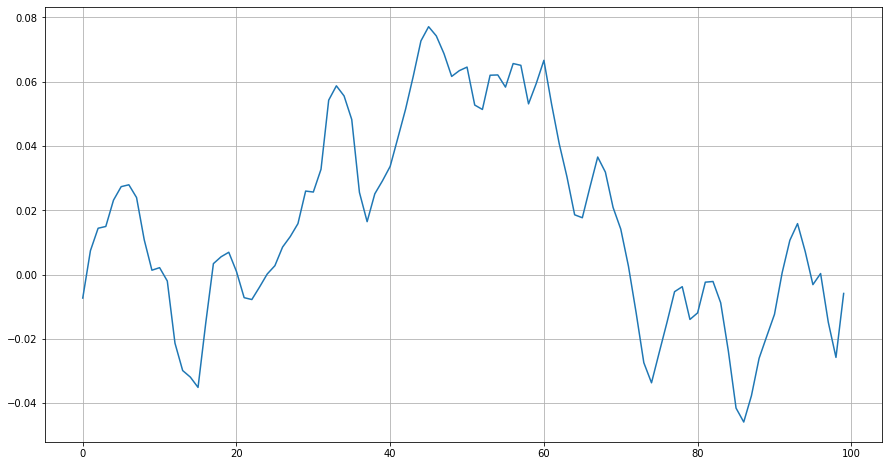

In [ ]:
plt.plot(x[300:400])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[300:400], pad=False)
print(zero_crossings)
print(sum(zero_crossings))

[False  True False False False False False False False False False  True
 False False False False False  True False False False  True False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False  True False False False  True
  True  True False False]
10


Napiszemy funkcję, która pełny wektor sygnału podziel na pewną liczbę fragmentów (```n_splits ```), obliczy dla każdego z nich wartości cech, a następnie wyznaczy wartość średnią i odchylenie standardowe.


In [ ]:
def calculate_stats(x,compute_feature,n_splits):
  delta = x.shape[0]//n_splits
  ys = np.zeros(n_splits)
  for i in range(n_splits):
    if i<n_splits-1:
      y = compute_feature(x[i*delta:(i+1)*delta])
    else:
      y = compute_feature(x[i*delta:])
    ys[i]=y
  # print(ys)
  return ys.mean(),ys.std()

# print(x)
# x to jedna z wczesniej załadowanych tablic sygnału
calculate_stats(x,lambda z:librosa.zero_crossings(z, pad=False).sum()/z.shape[0],10)



(0.08315264585719913, 0.010770225989245166)

Do funkcji ```calculate_stats``` przekazujemy obiekt funkcyjny ```compute_feature``` odpowiedzialny za obliczanie cechy. Może to być wyrażenie lambda.

* Tworzymy listę wartości średnich i odchyleń standardowych dla wszystkich plików
* Zamieniamy na ```ndarray```
* Dodajemy do DataFrame

**TODO 9.3.1**
Dodaj wariancję, czyli kwadrat std

In [ ]:
z = [calculate_stats(x,  ????? ,10) for x in df.audio]
z=np.array(z)
print(z.shape)
df['zero_crossing_rate_mean']=z[:,0]
df['zero_crossing_rate_var']=???
df.head()

(100, 2)


,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var
0,classical,classical.00009.wav,"[0.014556885, 0.020904541, 0.014343262, 0.0140...",22050,0.056318,0.000273
1,classical,classical.00004.wav,"[-0.010772705, -0.020019531, -0.024261475, -0....",22050,0.113025,0.000160
2,classical,classical.00002.wav,"[-0.04046631, -0.07815552, -0.087371826, -0.09...",22050,0.090184,0.000153
3,classical,classical.00003.wav,"[-0.008331299, -0.022583008, -0.043670654, -0....",22050,0.109106,0.000559
4,classical,classical.00001.wav,"[-0.011383057, -0.002166748, 0.01687622, 0.015...",22050,0.087911,0.000188


In [ ]:
print(df.shape)
# powinno być (100,6)

(100, 6)


### 9.3.2 Spectral centroid

Cecha reprezentuje ważoną średnią częstotliwości obecnych w dźwieku. Wagą jest amplituda dla danej czestości.

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape


(1293,)

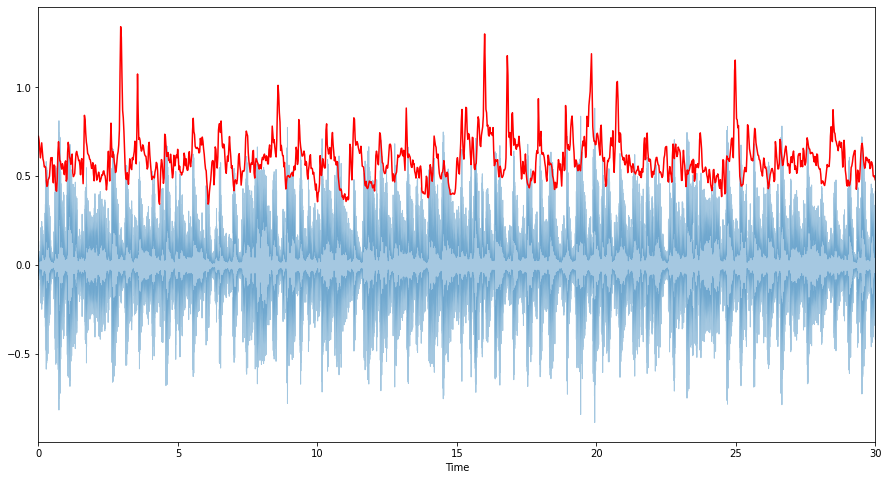

In [ ]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
spectral_centroids = spectral_centroids/(spectral_centroids.max()-spectral_centroids.min())
plt.plot(t, spectral_centroids, color='r');


Jak widać wartości zmieniają się w czasie. Policzymy średnie wartości i wariancje dla każdego utworu. Użyta funkcja calculate_stats standardowo dzieli utwór na 10 fragmentów.

**TODO 9.3.2**
* Dodaj do DataFrame kolumny 'spectral_centroid_mean' i 'spectral_centroid_var'

In [ ]:
z = [calculate_stats(x,lambda z:librosa.feature.spectral_centroid(y=z, sr=sr)[0].mean(),10) for x in df.audio]
z = np.array(z)
df['spectral_centroid_mean']=???
df['spectral_centroid_var']=???
df.head()

,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var,spectral_centroid_mean,spectral_centroid_var
0,classical,classical.00009.wav,"[0.014556885, 0.020904541, 0.014343262, 0.0140...",22050,0.056318,0.000273,1216.490186,44096.597865
1,classical,classical.00004.wav,"[-0.010772705, -0.020019531, -0.024261475, -0....",22050,0.113025,0.000160,1705.219843,19385.506566
2,classical,classical.00002.wav,"[-0.04046631, -0.07815552, -0.087371826, -0.09...",22050,0.090184,0.000153,1490.378080,8607.935700
3,classical,classical.00003.wav,"[-0.008331299, -0.022583008, -0.043670654, -0....",22050,0.109106,0.000559,1528.064761,30246.396563
4,classical,classical.00001.wav,"[-0.011383057, -0.002166748, 0.01687622, 0.015...",22050,0.087911,0.000188,1360.209759,10357.021704


In [ ]:
# Powinno być (100,8)
df.shape

(100, 8)

### 9.3.3.RMS
RMS (root mean square) to pierwiastek ze średniej kwadratów. Może zostać obliczony bezpośrednio z sygnału lub jego spektrogramu.

**TODO 9.3.3**
* Analogicznie jak w poprzednich punktach oblicz listę wartości wołając ```calculate_stats``` dla wszystkich ścieżek audio
* Dodaj kolumny 'rms_mean' i 'rms_var'

In [ ]:
z = [calculate_stats(x,???,10) for x in df.audio]
z = np.array(z)
df['rms_mean']=z[:,0]
df['rms_var']=z[:,1]**2
df.head()

,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var,spectral_centroid_mean,spectral_centroid_var,rms_mean,rms_var
0,classical,classical.00009.wav,"[0.014556885, 0.020904541, 0.014343262, 0.0140...",22050,0.056318,0.000273,1216.490186,44096.597865,0.023794,0.000126
1,classical,classical.00004.wav,"[-0.010772705, -0.020019531, -0.024261475, -0....",22050,0.113025,0.000160,1705.219843,19385.506566,0.042267,0.000015
2,classical,classical.00002.wav,"[-0.04046631, -0.07815552, -0.087371826, -0.09...",22050,0.090184,0.000153,1490.378080,8607.935700,0.043848,0.000075
3,classical,classical.00003.wav,"[-0.008331299, -0.022583008, -0.043670654, -0....",22050,0.109106,0.000559,1528.064761,30246.396563,0.029435,0.000148
4,classical,classical.00001.wav,"[-0.011383057, -0.002166748, 0.01687622, 0.015...",22050,0.087911,0.000188,1360.209759,10357.021704,0.030631,0.000033


In [ ]:
# Powinno być (100,10)
df.shape

(100, 10)

### 9.3.4 Spectral Rolloff

Cytując:
 *It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.
librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.*



(1293,)


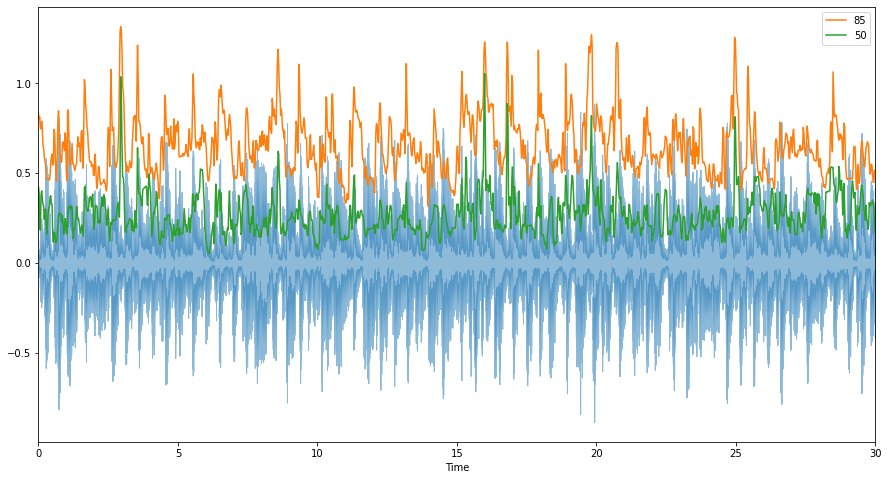

In [ ]:
spectral_rolloff85 = librosa.feature.spectral_rolloff(y=x, sr=sr,roll_percent=0.85)[0]
print(spectral_rolloff85.shape)
frames = range(spectral_rolloff85.shape[0])
t = librosa.frames_to_time(frames)

librosa.display.waveplot(x, sr=sr, alpha=0.5)
plt.plot(t, spectral_rolloff85/(spectral_rolloff85.max()-spectral_rolloff85.min()),label='85')
spectral_rolloff50 = librosa.feature.spectral_rolloff(y=x, sr=sr,roll_percent=0.50)[0]
plt.plot(t, spectral_rolloff50/(spectral_rolloff50.max()-spectral_rolloff50.min()),label='50')
plt.legend()
plt.show()



**TODO 9.3.4**
Analogicznie, jak w w punktach 3.1, 3.2 i 3.3. dodajemy cechy do df
* wołamy calculate_stats dla wszystkich plików przekazując funkcję obliczającą spectral_rolloff (ustawiamy sr=sr, roll_percent=0.85)
* Dodajemy kolumny 'spectral_rolloff_mean' i 'spectral_rolloff_var'


In [ ]:
z = [calculate_stats(x,????,10) for x in df.audio]
z = np.array(z)
df['spectral_rolloff_mean']=???
df['spectral_rolloff_var']=????
df.head()

,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var,spectral_centroid_mean,spectral_centroid_var,rms_mean,rms_var,spectral_rolloff_mean,spectral_rolloff_var
0,classical,classical.00009.wav,"[0.014556885, 0.020904541, 0.014343262, 0.0140...",22050,0.056318,0.000273,1216.490186,44096.597865,0.023794,0.000126,2561.896278,194029.170833
1,classical,classical.00004.wav,"[-0.010772705, -0.020019531, -0.024261475, -0....",22050,0.113025,0.000160,1705.219843,19385.506566,0.042267,0.000015,3173.654579,90702.809277
2,classical,classical.00002.wav,"[-0.04046631, -0.07815552, -0.087371826, -0.09...",22050,0.090184,0.000153,1490.378080,8607.935700,0.043848,0.000075,2785.054800,27281.869279
3,classical,classical.00003.wav,"[-0.008331299, -0.022583008, -0.043670654, -0....",22050,0.109106,0.000559,1528.064761,30246.396563,0.029435,0.000148,2915.380371,102374.413265
4,classical,classical.00001.wav,"[-0.011383057, -0.002166748, 0.01687622, 0.015...",22050,0.087911,0.000188,1360.209759,10357.021704,0.030631,0.000033,2386.798208,66259.286619


In [ ]:
# Powinno być (100,12)
df.shape

(100, 12)

### 9.3.5 Mel Frequency Cepstral Coefficients

Cechy te powiązane są z nieliniową wrażliwością na słyszane częstotliwości. Patrz: [szybkie wprowadzenie na medium.com](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd)

Standardowo oblicza się 20 cech...

(20, 1293)


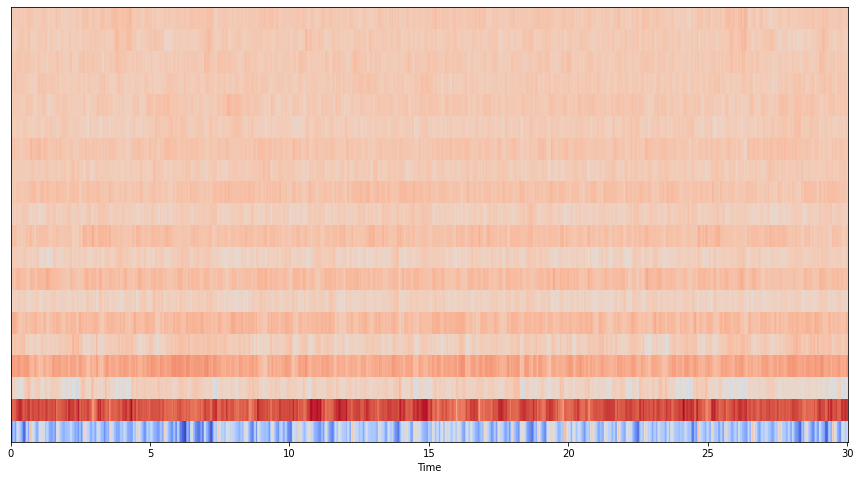

In [ ]:
mfc = librosa.feature.mfcc(y=x, sr=sr)
print(mfc.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfc, sr=sr, x_axis='time');

In [ ]:
# wartości średnie i wariancje cech
print(mfc.mean(axis=1))
print(mfc.std(axis=1)**2)



[-113.57065     121.57179     -19.168142     42.36642      -6.364664
   18.623499    -13.704891     15.34315     -12.27411      10.976572
   -8.326573      8.803793     -3.6723        5.747995     -5.162882
    0.75273985   -1.6902149    -0.40897894   -2.3035226     1.2212901 ]
[2564.2075    295.91385   235.57445   151.1069    167.9348     89.18084
   67.6605     68.93258    82.2042     63.386314   61.773087   51.244118
   41.21742    40.554478   49.775425   52.42091    36.52407    41.597103
   55.062927   46.936028]


Czyli dla każdego utworu otrzymamy dwudziestoelementowe wektrory średnich i wariancji. Utworzymy 2 * 20 kolumn DataFrame - mfcc01_mean ... mfcc20_mean i mfcc01_var ... mfcc20_var

In [ ]:
# przetwarzamy wszystkie cechy
def get_stats(mfc):
  return mfc.mean(axis=1),mfc.std(axis=1)**2

mfcs = [get_stats(librosa.feature.mfcc(y=x, sr=sr)) for x in df.audio]



Tworzymy słownik, którego kluczami są nazwy cech, a wartościami - listy zawierające elementy wyznaczone dla kolejnych utworów

**TODO 9.3.5**
* Dodaj zawartość słownika jako kolumny do DataFrame, np. wykonując: ```df[klucz]=pd.Series(wartość)```

In [ ]:
dict = {}
for i in range(mfcs[0][0].shape[0]):
  dict[f'mfcc{i+1:02}_mean']=[]
  dict[f'mfcc{i+1:02}_var']=[]
for k in range(len(mfcs)):
  for i in range(mfcs[k][0].shape[0]):
    dict[f'mfcc{i+1:02}_mean'].append(mfcs[k][0][i])
  for i in range(mfcs[k][1].shape[0]):
    dict[f'mfcc{i+1:02}_var'].append(mfcs[k][1][i])

# print(dict)

for k in dict:
  df[k]=????
df.head()

,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var,spectral_centroid_mean,spectral_centroid_var,rms_mean,rms_var,spectral_rolloff_mean,spectral_rolloff_var,mfcc01_mean,mfcc01_var,mfcc02_mean,mfcc02_var,mfcc03_mean,mfcc03_var,mfcc04_mean,mfcc04_var,mfcc05_mean,mfcc05_var,mfcc06_mean,mfcc06_var,mfcc07_mean,mfcc07_var,mfcc08_mean,mfcc08_var,mfcc09_mean,mfcc09_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,classical,classical.00009.wav,"[0.014556885, 0.020904541, 0.014343262, 0.0140...",22050,0.056318,0.000273,1216.490186,44096.597865,0.023794,0.000126,2561.896278,194029.170833,-356.105896,5138.998047,139.812668,594.842407,-6.278577,222.142578,43.177387,75.920815,-8.851788,121.299347,11.047903,64.212715,-8.375142,70.260994,4.419640,55.727222,-8.284429,84.148659,8.676265,59.429455,-8.135021,59.158836,3.428734,62.910938,-1.439430,81.050583,-0.422975,75.628326,-1.727986,81.841583,-0.289919,79.411140,-0.660843,80.768028,1.160320,105.002174,-0.618511,92.521919,-0.254033,88.053047
1,classical,classical.00004.wav,"[-0.010772705, -0.020019531, -0.024261475, -0....",22050,0.113025,0.000160,1705.219843,19385.506566,0.042267,0.000015,3173.654579,90702.809277,-259.915131,559.994202,118.950165,220.623672,-35.617493,142.532074,31.963696,64.236458,-16.525824,75.869499,10.616533,58.395416,-15.653919,56.340309,7.417118,109.246628,-5.822312,96.478905,8.268572,96.748726,-17.982002,184.843124,-1.185533,161.261414,-6.355772,104.342644,2.748989,143.830902,-2.585194,83.438316,4.403328,83.138359,-4.125299,69.470558,-4.787770,131.776337,-4.774069,115.447807,-4.603728,217.122009
2,classical,classical.00002.wav,"[-0.04046631, -0.07815552, -0.087371826, -0.09...",22050,0.090184,0.000153,1490.378080,8607.935700,0.043848,0.000075,2785.054800,27281.869279,-235.253723,857.942932,141.109985,197.688095,-34.670734,151.697357,30.966612,136.075378,-16.380020,51.464291,23.110828,81.581482,-11.030149,79.478058,7.638682,59.445889,-19.011942,50.834618,4.219429,77.911613,-11.827600,60.403744,8.911826,67.262627,-1.431638,99.733551,4.288130,81.594810,1.475192,94.948868,3.171561,85.150909,-1.309433,77.170746,2.945178,74.202660,-1.655027,59.096081,-2.896193,53.000439
3,classical,classical.00003.wav,"[-0.008331299, -0.022583008, -0.043670654, -0....",22050,0.109106,0.000559,1528.064761,30246.396563,0.029435,0.000148,2915.380371,102374.413265,-326.861084,3202.030518,127.402405,309.813385,-30.606897,462.589783,37.458172,127.535774,-5.300833,131.176254,20.819963,116.825882,-1.774824,72.766998,-4.613475,100.286743,-4.044669,93.047157,5.224090,73.665794,-0.653077,125.600029,2.794031,173.143204,7.235353,151.135330,3.975654,113.026062,-2.387836,154.935699,1.499585,125.197098,0.597389,111.539612,-0.595684,151.719910,2.341259,133.902252,2.640535,210.365616
4,classical,classical.00001.wav,"[-0.011383057, -0.002166748, 0.01687622, 0.015...",22050,0.087911,0.000188,1360.209759,10357.021704,0.030631,0.000033,2386.798208,66259.286619,-324.061157,984.016663,133.594574,333.298340,-25.044693,187.519211,24.552649,151.717148,-11.947024,130.163788,17.667559,139.478943,-5.524336,123.143349,1.711051,82.182915,-10.577142,76.726608,-0.849830,82.189575,-7.808103,98.431038,3.525355,117.615974,5.048823,192.858704,1.367480,156.295425,3.010916,163.492477,-3.128689,158.498138,-4.289846,75.676437,0.591010,134.617691,2.877631,153.630554,0.373280,123.707382


In [ ]:
# Powinno być (100,52)
df.shape

(100, 52)

### 9.3.6 Częstości chromatyczne (Chroma Frequencies )

Reprezentują rozkład w widmie poszczególnych półtonów, np. A: 440HZ,880Hz, 1760Hz, itd.

Jest ich w sumie 12: C, C#, D, D#, E, F, F#, G, G#, A, A#, B

(12, 1293)


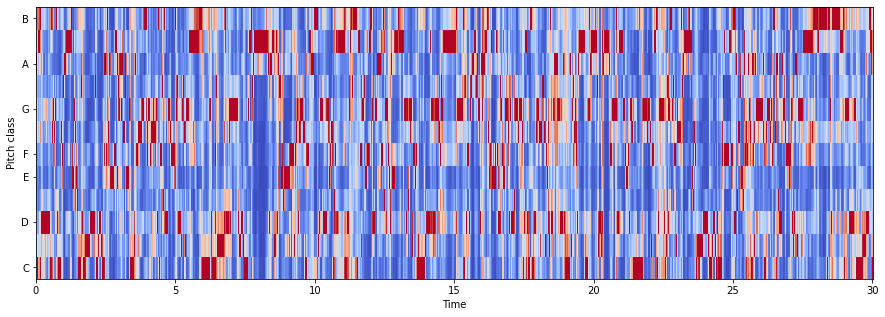

In [ ]:
hop_length=512 #skok pomiędzy oknami
chroma = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
print(chroma.shape)

Sytuacja jest podobna do MFCC. Dla każdego utworu otrzymujemy tablicę z 12 wierszami (odpowiadającymi półtonom) i kolumnami odpowidajacymi oknom.

**TODO 9.3.6**
* Dodaj kolumny chroma01_mean, chroma_01_var ... chroma12_mean, chroma_12_var do DataFrame

In [ ]:
chromas = [get_stats(librosa.feature.chroma_stft(y=x, sr=sr)) for x in df.audio]

dict = {}
for i in range(chromas[0][0].shape[0]):
  dict[f'chroma{i+1:02}_mean']=[]
  dict[f'chroma{i+1:02}_var']=[]
for k in range(len(chromas)):
  for i in range(chromas[k][0].shape[0]):
    dict[f'chroma{i+1:02}_mean'].append(chromas[k][0][i])
  for i in range(chromas[k][1].shape[0]):
    dict[f'chroma{i+1:02}_var'].append(chromas[k][1][i])

print(dict)

# for k in dict:
#   df[k]=pd.Series(dict[k])
# df.head()

{'chroma01_mean': [0.33007726, 0.32666346, 0.19740826, 0.3339847, 0.16393304, 0.47980785, 0.5870657, 0.18909083, 0.12454454, 0.31514874, 0.24822946, 0.19262847, 0.27318853, 0.3410062, 0.31958136, 0.26209104, 0.46005195, 0.4255088, 0.23830429, 0.362313, 0.6355357, 0.29474247, 0.36042753, 0.5070296, 0.5450359, 0.3431954, 0.37561214, 0.40861776, 0.32099667, 0.36324453, 0.3990885, 0.38642737, 0.2401534, 0.2225837, 0.4412824, 0.22571315, 0.30306414, 0.08942899, 0.35413593, 0.202198, 0.62217575, 0.3879262, 0.3925092, 0.49343187, 0.37553713, 0.5714625, 0.4031128, 0.3998963, 0.4250105, 0.43466353, 0.4748138, 0.34361723, 0.28104722, 0.38702565, 0.35559848, 0.31543508, 0.30624902, 0.440042, 0.31377915, 0.26329577, 0.58760697, 0.3461405, 0.5237357, 0.3709841, 0.53178424, 0.5078986, 0.42926574, 0.39936653, 0.5585621, 0.35898495, 0.55642396, 0.46101597, 0.6606687, 0.43325254, 0.4206886, 0.3198922, 0.29653245, 0.45095572, 0.3983912, 0.3175488, 0.35452613, 0.39127174, 0.3385978, 0.46736327, 0.5173553

In [ ]:
???
df.head()

chroma01_mean
chroma01_var
chroma02_mean
chroma02_var
chroma03_mean
chroma03_var
chroma04_mean
chroma04_var
chroma05_mean
chroma05_var
chroma06_mean
chroma06_var
chroma07_mean
chroma07_var
chroma08_mean
chroma08_var
chroma09_mean
chroma09_var
chroma10_mean
chroma10_var
chroma11_mean
chroma11_var
chroma12_mean
chroma12_var


,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var,spectral_centroid_mean,spectral_centroid_var,rms_mean,rms_var,spectral_rolloff_mean,spectral_rolloff_var,mfcc01_mean,mfcc01_var,mfcc02_mean,mfcc02_var,mfcc03_mean,mfcc03_var,mfcc04_mean,mfcc04_var,mfcc05_mean,mfcc05_var,mfcc06_mean,mfcc06_var,mfcc07_mean,mfcc07_var,mfcc08_mean,mfcc08_var,mfcc09_mean,mfcc09_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,chroma01_mean,chroma01_var,chroma02_mean,chroma02_var,chroma03_mean,chroma03_var,chroma04_mean,chroma04_var,chroma05_mean,chroma05_var,chroma06_mean,chroma06_var,chroma07_mean,chroma07_var,chroma08_mean,chroma08_var,chroma09_mean,chroma09_var,chroma10_mean,chroma10_var,chroma11_mean,chroma11_var,chroma12_mean,chroma12_var
0,classical,classical.00009.wav,"[0.014556885, 0.020904541, 0.014343262, 0.0140...",22050,0.056318,0.000273,1216.490186,44096.597865,0.023794,0.000126,2561.896278,194029.170833,-356.105896,5138.998047,139.812668,594.842407,-6.278577,222.142578,43.177387,75.920815,-8.851788,121.299347,11.047903,64.212715,-8.375142,70.260994,4.419640,55.727222,-8.284429,84.148659,8.676265,59.429455,-8.135021,59.158836,3.428734,62.910938,-1.439430,81.050583,-0.422975,75.628326,-1.727986,81.841583,-0.289919,79.411140,-0.660843,80.768028,1.160320,105.002174,-0.618511,92.521919,-0.254033,88.053047,0.330077,0.122640,0.224335,0.028558,0.426305,0.137994,0.416318,0.118238,0.181330,0.029370,0.179326,0.057382,0.232602,0.061283,0.321805,0.099639,0.213113,0.057743,0.254609,0.071775,0.281618,0.093348,0.184853,0.027074
1,classical,classical.00004.wav,"[-0.010772705, -0.020019531, -0.024261475, -0....",22050,0.113025,0.000160,1705.219843,19385.506566,0.042267,0.000015,3173.654579,90702.809277,-259.915131,559.994202,118.950165,220.623672,-35.617493,142.532074,31.963696,64.236458,-16.525824,75.869499,10.616533,58.395416,-15.653919,56.340309,7.417118,109.246628,-5.822312,96.478905,8.268572,96.748726,-17.982002,184.843124,-1.185533,161.261414,-6.355772,104.342644,2.748989,143.830902,-2.585194,83.438316,4.403328,83.138359,-4.125299,69.470558,-4.787770,131.776337,-4.774069,115.447807,-4.603728,217.122009,0.326663,0.115534,0.140226,0.024339,0.249061,0.118054,0.126175,0.013594,0.341997,0.136070,0.241625,0.105913,0.122987,0.035079,0.129966,0.041241,0.183229,0.070243,0.310166,0.124506,0.182775,0.055630,0.304015,0.101638
2,classical,classical.00002.wav,"[-0.04046631, -0.07815552, -0.087371826, -0.09...",22050,0.090184,0.000153,1490.378080,8607.935700,0.043848,0.000075,2785.054800,27281.869279,-235.253723,857.942932,141.109985,197.688095,-34.670734,151.697357,30.966612,136.075378,-16.380020,51.464291,23.110828,81.581482,-11.030149,79.478058,7.638682,59.445889,-19.011942,50.834618,4.219429,77.911613,-11.827600,60.403744,8.911826,67.262627,-1.431638,99.733551,4.288130,81.594810,1.475192,94.948868,3.171561,85.150909,-1.309433,77.170746,2.945178,74.202660,-1.655027,59.096081,-2.896193,53.000439,0.197408,0.018763,0.423735,0.123738,0.361969,0.106689,0.232111,0.040728,0.393312,0.135134,0.146246,0.012602,0.232608,0.083900,0.141548,0.021263,0.281557,0.076378,0.286905,0.087733,0.178080,0.016680,0.460017,0.150065
3,classical,classical.00003.wav,"[-0.008331299, -0.022583008, -0.043670654, -0....",22050,0.109106,0.000559,1528.064761,30246.396563,0.029435,0.000148,2915.380371,102374.413265,-326.861084,3202.030518,127.402405,309.813385,-30.606897,462.589783,37.458172,127.535774,-5.300833,131.176254,20.819963,116.825882,-1.774824,72.766998,-4.613475,100.286743,-4.044669,93.047157,5.224090,73.665794,-0.653077,125.600029,2.794031,173.143204,7.235353,151.135330,3.975654,113.026062,-2.387836,154.935699,1.499585,125.197098,0.597389,111.539612,-0.595684,151.719910,2.341259,133.902252,2.640535,210.365616,0.333985,0.140403,0.139870,0.014449,0.348687,0.15031

In [ ]:
# Powinno być (100,76)
df.shape

(100, 76)

### 9.3.7 Tempo utworu

Tempo utworu jest mierzone w [BPM (beats per minute)](https://en.wikipedia.org/wiki/Tempo) - czyli liczbie taktów na minutę. Okreslanie tempa opiera się na wykrywaniu  [początków nut (ang. onset detection)](https://en.wikipedia.org/wiki/Onset_(audio)), a następnie próbie dopasowania do nich tempa. [Więcej informacji](https://www.ee.columbia.edu/~dpwe/e4896/lectures/E4896-L10.pdf)

In [ ]:
# Można to zrobić w jednym kroku przyjmujące standardowe wartości
x = df.audio[df.file=='blues.00000.wav'].iloc[0]
tempo = librosa.feature.rhythm.tempo(y=x)
print(tempo)

[123.046875]


In [ ]:
# lub dostroić parametry
hop_length = 512 #wielkosć okna
oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
tempo = librosa.feature.rhythm.tempo(onset_envelope=oenv, sr=sr,hop_length=hop_length)[0]
print(tempo)

123.046875


Poniżej kod i ilustracje z dokumentacji librosa. Poziome paski na tempogramie to wielokrotności taktów, ale też półnuty, ćwierćnuty, ósemki, itd.

In [ ]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.feature.rhythm.tempo(onset_envelope=oenv, sr=sr,hop_length=hop_length)[0]

print(tempogram.shape)
print(tempo)



(384, 1293)
123.046875


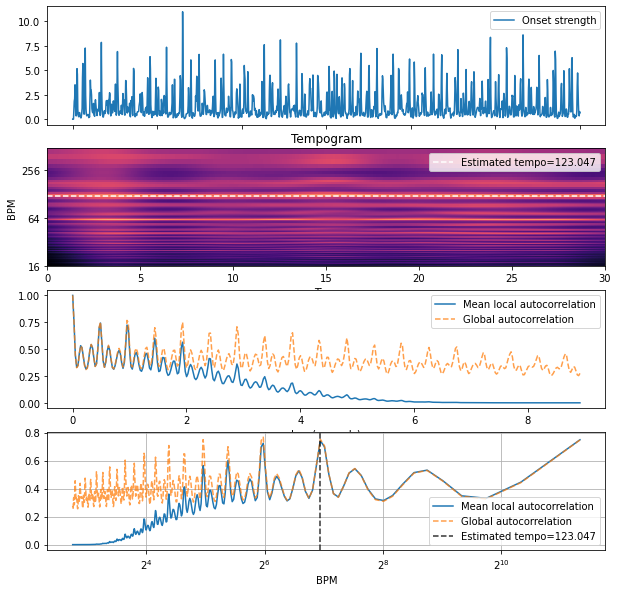

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', base=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', base=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

**TODO 9.3.7**
1. Utwórz listę wartości tempa dla wszystkich utworów w df.audio
2. Dodaj kolumnę `tempo`

In [ ]:
tempos=[librosa.feature.rhythm.tempo(y=x)[0] for ????]
???? tempos
df.head()

,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var,spectral_centroid_mean,spectral_centroid_var,rms_mean,rms_var,spectral_rolloff_mean,spectral_rolloff_var,mfcc01_mean,mfcc01_var,mfcc02_mean,mfcc02_var,mfcc03_mean,mfcc03_var,mfcc04_mean,mfcc04_var,mfcc05_mean,mfcc05_var,mfcc06_mean,mfcc06_var,mfcc07_mean,mfcc07_var,mfcc08_mean,mfcc08_var,mfcc09_mean,mfcc09_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,chroma01_mean,chroma01_var,chroma02_mean,chroma02_var,chroma03_mean,chroma03_var,chroma04_mean,chroma04_var,chroma05_mean,chroma05_var,chroma06_mean,chroma06_var,chroma07_mean,chroma07_var,chroma08_mean,chroma08_var,chroma09_mean,chroma09_var,chroma10_mean,chroma10_var,chroma11_mean,chroma11_var,chroma12_mean,chroma12_var,tempo
0,classical,classical.00009.wav,"[0.014556885, 0.020904541, 0.014343262, 0.0140...",22050,0.056318,0.000273,1216.490186,44096.597865,0.023794,0.000126,2561.896278,194029.170833,-356.105896,5138.998047,139.812668,594.842407,-6.278577,222.142578,43.177387,75.920815,-8.851788,121.299347,11.047903,64.212715,-8.375142,70.260994,4.419640,55.727222,-8.284429,84.148659,8.676265,59.429455,-8.135021,59.158836,3.428734,62.910938,-1.439430,81.050583,-0.422975,75.628326,-1.727986,81.841583,-0.289919,79.411140,-0.660843,80.768028,1.160320,105.002174,-0.618511,92.521919,-0.254033,88.053047,0.330077,0.122640,0.224335,0.028558,0.426305,0.137994,0.416318,0.118238,0.181330,0.029370,0.179326,0.057382,0.232602,0.061283,0.321805,0.099639,0.213113,0.057743,0.254609,0.071775,0.281618,0.093348,0.184853,0.027074,129.199219
1,classical,classical.00004.wav,"[-0.010772705, -0.020019531, -0.024261475, -0....",22050,0.113025,0.000160,1705.219843,19385.506566,0.042267,0.000015,3173.654579,90702.809277,-259.915131,559.994202,118.950165,220.623672,-35.617493,142.532074,31.963696,64.236458,-16.525824,75.869499,10.616533,58.395416,-15.653919,56.340309,7.417118,109.246628,-5.822312,96.478905,8.268572,96.748726,-17.982002,184.843124,-1.185533,161.261414,-6.355772,104.342644,2.748989,143.830902,-2.585194,83.438316,4.403328,83.138359,-4.125299,69.470558,-4.787770,131.776337,-4.774069,115.447807,-4.603728,217.122009,0.326663,0.115534,0.140226,0.024339,0.249061,0.118054,0.126175,0.013594,0.341997,0.136070,0.241625,0.105913,0.122987,0.035079,0.129966,0.041241,0.183229,0.070243,0.310166,0.124506,0.182775,0.055630,0.304015,0.101638,107.666016
2,classical,classical.00002.wav,"[-0.04046631, -0.07815552, -0.087371826, -0.09...",22050,0.090184,0.000153,1490.378080,8607.935700,0.043848,0.000075,2785.054800,27281.869279,-235.253723,857.942932,141.109985,197.688095,-34.670734,151.697357,30.966612,136.075378,-16.380020,51.464291,23.110828,81.581482,-11.030149,79.478058,7.638682,59.445889,-19.011942,50.834618,4.219429,77.911613,-11.827600,60.403744,8.911826,67.262627,-1.431638,99.733551,4.288130,81.594810,1.475192,94.948868,3.171561,85.150909,-1.309433,77.170746,2.945178,74.202660,-1.655027,59.096081,-2.896193,53.000439,0.197408,0.018763,0.423735,0.123738,0.361969,0.106689,0.232111,0.040728,0.393312,0.135134,0.146246,0.012602,0.232608,0.083900,0.141548,0.021263,0.281557,0.076378,0.286905,0.087733,0.178080,0.016680,0.460017,0.150065,99.384014
3,classical,classical.00003.wav,"[-0.008331299, -0.022583008, -0.043670654, -0....",22050,0.109106,0.000559,1528.064761,30246.396563,0.029435,0.000148,2915.380371,102374.413265,-326.861084,3202.030518,127.402405,309.813385,-30.606897,462.589783,37.458172,127.535774,-5.300833,131.176254,20.819963,116.825882,-1.774824,72.766998,-4.613475,100.286743,-4.044669,93.047157,5.224090,73.665794,-0.653077,125.600029,2.794031,173.143204,7.235353,151.135330,3.975654,113.026062,-2.387836,154.935699,1.499585,125.197098,0.597389,111.539612,-0.595684,151.719910,2.341259,133.902252,2.640535,210.365616,0.333985,0.140

**TODO 9.3.8**

Sprawdź liczbę wierszy i kolumn. Oczekiwany wynik (100,77)

In [ ]:
____

(100, 77)

## 4. Zapisz do pliku

**TODO 9.3.9**

Zapisz DataFrame do pliku 'gitzan_small_features.csv' i pobierz plik.




In [ ]:
????
